In [141]:

#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones.csv')


In [143]:
# Muestra las primeras filas del DataFrame
print(f"primeras filas del DataFrame {df.head()}")

# Muestra información general sobre el DataFrame
print(f"información general sobre el DataFrame {df.info()}")

# Muestra estadísticas descriptivas básicas
print(f"estadísticas descriptivas básicas {df.describe()}")


primeras filas del DataFrame    Unnamed: 0               fecha HORA declarada  \
0           0  September 17, 1908           1718   
1           1  September 07, 1909              ?   
2           2       July 12, 1912           0630   
3           3     August 06, 1913              ?   
4           4  September 09, 1913           1830   

                                 Ruta                OperadOR flight_no  \
0                 Fort Myer, Virginia    Military - U.S. Army         ?   
1             Juvisy-sur-Orge, France                       ?         ?   
2           Atlantic City, New Jersey    Military - U.S. Navy         ?   
3  Victoria, British Columbia, Canada                 Private         ?   
4                  Over the North Sea  Military - German Navy         ?   

           route                 ac_type registration cn_ln all_aboard  \
0  Demonstration        Wright Flyer III            ?     1          2   
1       Air show          Wright Byplane          SC1     ?

In [144]:
import pandas as pd

# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones.csv')

# Elimina las filas con valores nulos o desconocidos en las columnas de interés
df.dropna(subset=['fecha', 'HORA declarada', 'Ruta', 'OperadOR'], inplace=True)

# Convierte la columna 'HORA declarada' al formato de hora adecuado
df['Hora'] = pd.to_datetime(df['HORA declarada'], format='%H%M', errors='coerce').dt.time

# Convierte la columna 'fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y', errors='coerce')

# Filtra las filas con fechas válidas
df = df[df['Fecha'].notna()]

# Filtra las filas con años diferentes de 1900
df = df[df['Fecha'].dt.year != 1900]

# Puedes realizar más limpieza y transformaciones si es necesario, como convertir columnas a tipos numéricos

# Guarda el DataFrame limpio en un nuevo archivo CSV si lo deseas
df.to_csv('AccidentesAviones_Limpio.csv', index=False)


In [145]:

## Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Verifica la estructura y los primeros registros del DataFrame
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5026 non-null   object
 1   fecha                   5025 non-null   object
 2   HORA declarada          5025 non-null   object
 3   Ruta                    5024 non-null   object
 4   OperadOR                5023 non-null   object
 5   flight_no               5021 non-null   object
 6   route                   5019 non-null   object
 7   ac_type                 5020 non-null   object
 8   registration            5018 non-null   object
 9   cn_ln                   5007 non-null   object
 10  all_aboard              5001 non-null   object
 11  PASAJEROS A BORDO       5005 non-null   object
 12  crew_aboard             4997 non-null   object
 13  cantidad de fallecidos  4995 non-null   object
 14  passenger_fatalities    4995 non-null   object
 15  crew

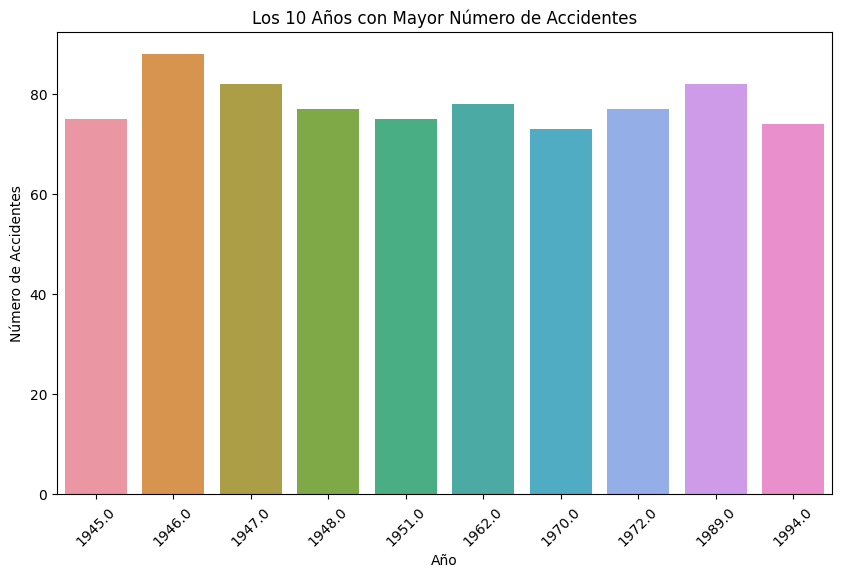

In [146]:
# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Cuenta las ocurrencias de accidentes por año
año_counts = df['Fecha'].dt.year.value_counts()

# Ordena los años por cantidad de accidentes y selecciona los 10 años más concurridos
top_años = año_counts.sort_values(ascending=False).head(10)

# Crea un gráfico de barras de los 10 años con mayor número de accidentes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_años.index, y=top_años.values)
plt.title('Los 10 Años con Mayor Número de Accidentes')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


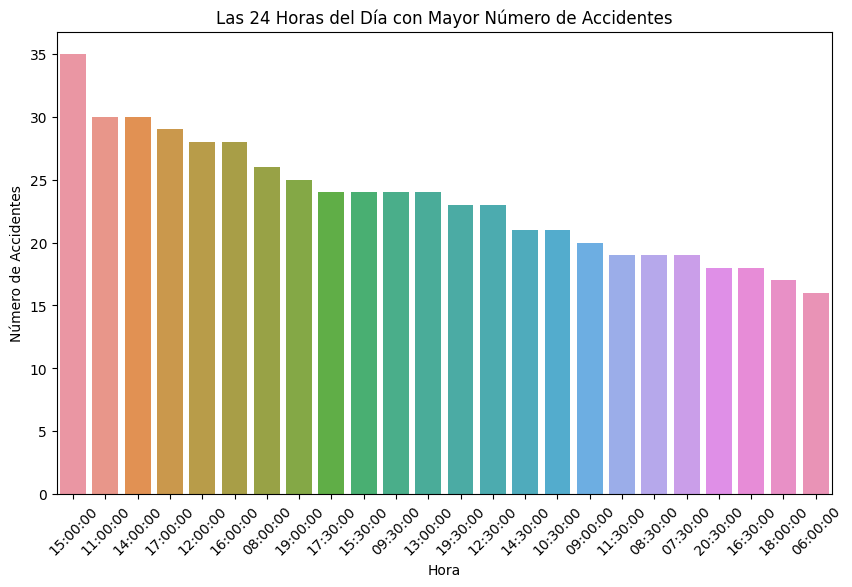

In [147]:
# Cuenta las ocurrencias de cada hora
hora_counts = df['Hora'].value_counts()

# Selecciona las 10 horas más comunes
top_horas = hora_counts.head(24)

# Crea un gráfico de barras de las 10 horas con mayor número de accidentes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_horas.index, y=top_horas.values)
plt.title('Las 24 Horas del Día con Mayor Número de Accidentes')
plt.xlabel('Hora')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


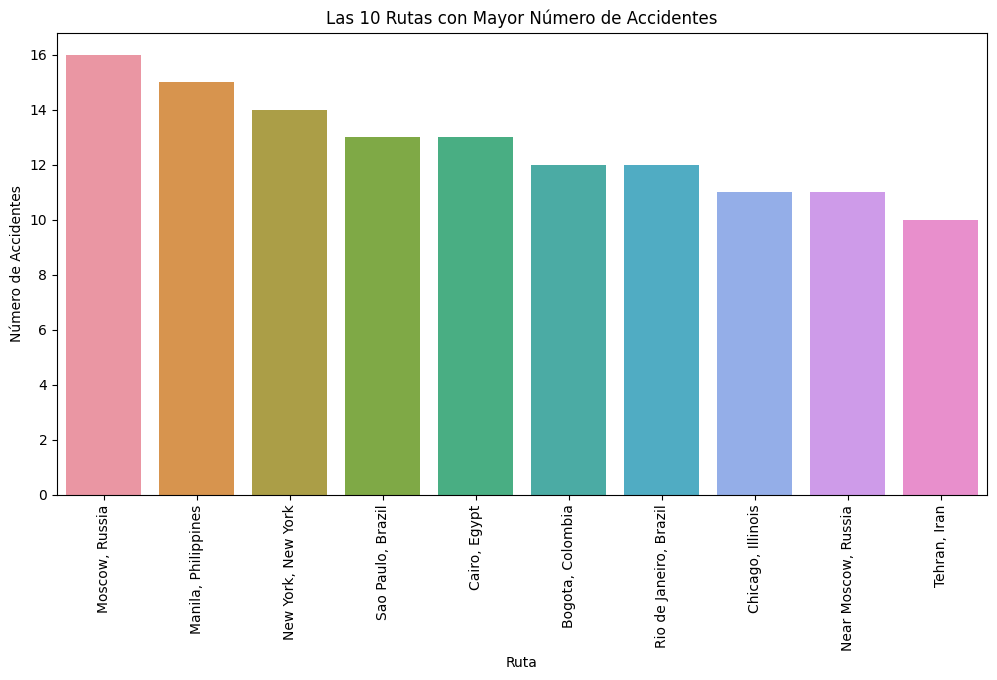

In [148]:
# Cuenta las ocurrencias de cada ubicación (Ruta)
ruta_counts = df['Ruta'].value_counts()

# Selecciona las 10 rutas más comunes
top_rutas = ruta_counts.head(10)

# Crea un gráfico de barras de las 10 rutas con mayor número de accidentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rutas.index, y=top_rutas.values)
plt.title('Las 10 Rutas con Mayor Número de Accidentes')
plt.xlabel('Ruta')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=90)
plt.show()


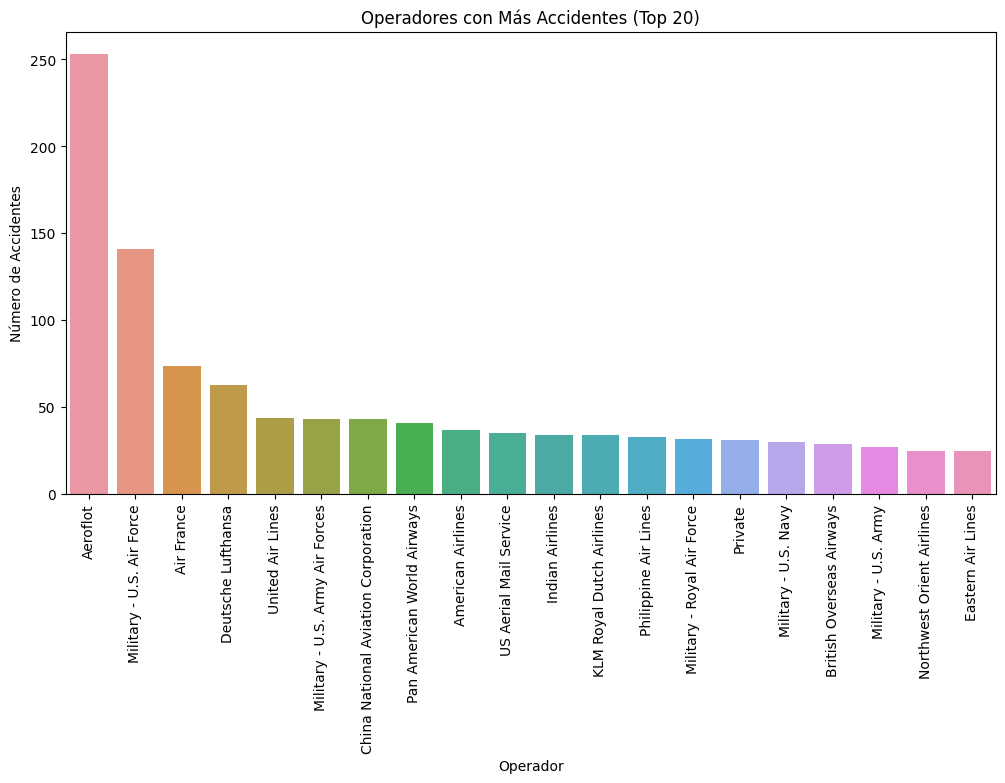

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cuenta las ocurrencias de cada operador
operador_counts = df['OperadOR'].value_counts()

# Selecciona los 20 operadores con más accidentes
top_operadores = operador_counts.head(20)

# Crea un gráfico de barras para visualizar los 20 operadores con más accidentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operadores.index, y=top_operadores.values)
plt.title('Operadores con Más Accidentes (Top 20)')
plt.xlabel('Operador')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=90)
plt.show()


/var/folders/q1/58gkg1056zl5yypp4l5g7fxw0000gn/T/ipykernel_3404/15056549.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_aerolineas, x='OperadOR', y='cantidad de fallecidos', estimator=sum, ci=None)


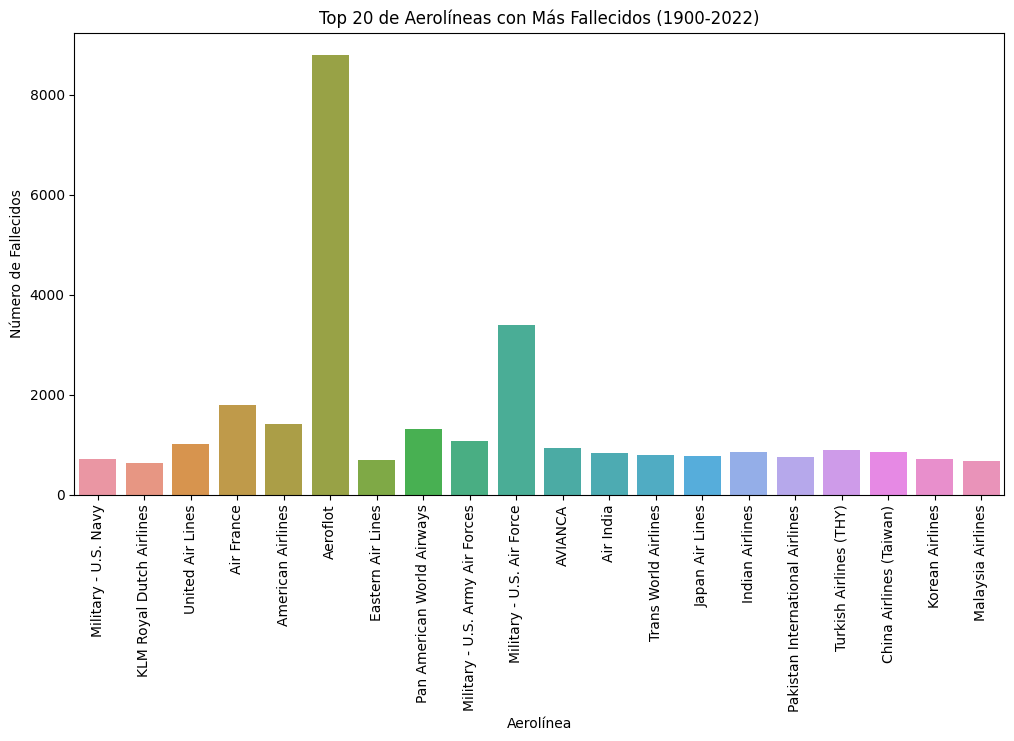

In [174]:

# Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que la columna 'cantidad de fallecidos' sea numérica
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Calcula el total de fallecidos por aerolínea
total_fallecidos_por_aerolinea = df.groupby('OperadOR')['cantidad de fallecidos'].sum()

# Ordena las aerolíneas por la cantidad total de fallecidos de mayor a menor
top_aerolineas = total_fallecidos_por_aerolinea.nlargest(20)

# Filtra el DataFrame original para incluir solo las filas de las top 20 aerolíneas
df_top_aerolineas = df[df['OperadOR'].isin(top_aerolineas.index)]

# Crea un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.set_palette("husl")  # Paleta de colores
sns.barplot(data=df_top_aerolineas, x='OperadOR', y='cantidad de fallecidos', estimator=sum, ci=None)
plt.title('Top 20 de Aerolíneas con Más Fallecidos (1900-2022)')
plt.xlabel('Aerolínea')
plt.ylabel('Número de Fallecidos')
plt.xticks(rotation=90)
plt.show()


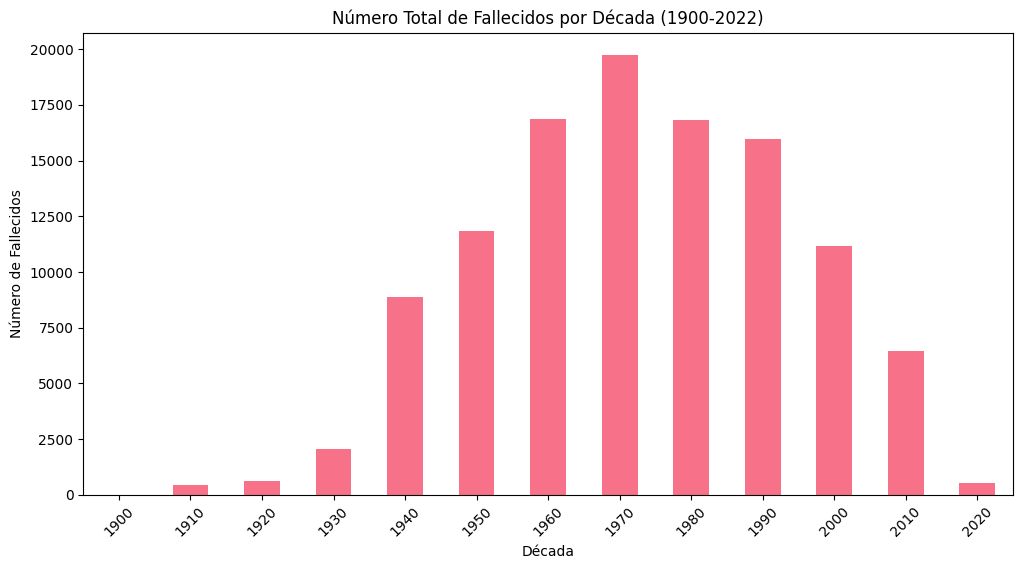

In [176]:

# Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Convierte la columna 'Fecha' en un objeto de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que la columna 'cantidad de fallecidos' sea numérica
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Agrupa los datos por década y calcula la suma de fallecidos por década
df['Década'] = df['Fecha'].dt.year // 10 * 10
fallecidos_por_década = df.groupby('Década')['cantidad de fallecidos'].sum()

# Crea un gráfico de barras para mostrar el número total de fallecidos por década
plt.figure(figsize=(12, 6))
fallecidos_por_década.plot(kind='bar')
plt.title('Número Total de Fallecidos por Década (1900-2022)')
plt.xlabel('Década')
plt.ylabel('Número de Fallecidos')
plt.xticks(rotation=45)
plt.show()


<Figure size 640x480 with 0 Axes>

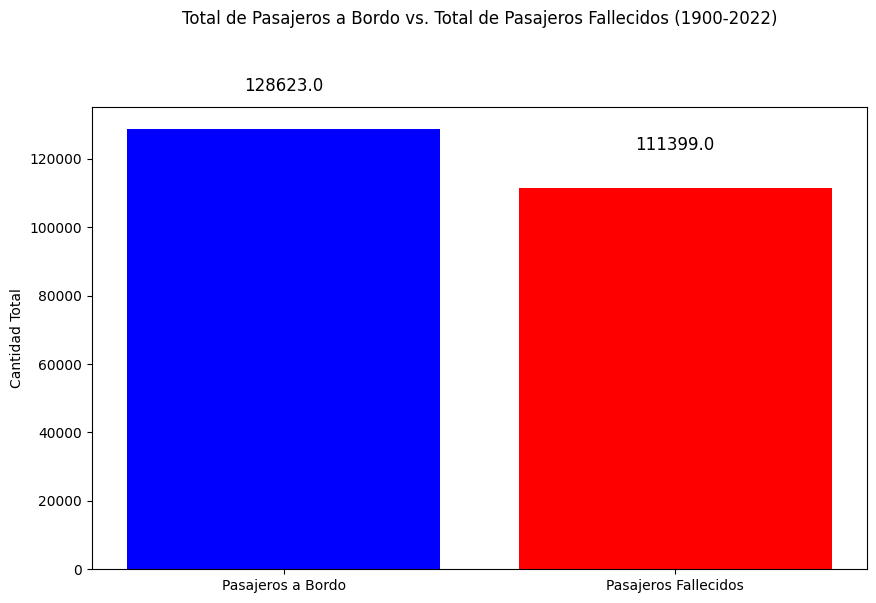

In [186]:
##Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Convierte la columna 'Fecha' en un objeto de fecha y maneja fechas incorrectas como valores nulos
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que las columnas 'PASAJEROS A BORDO' y 'cantidad de fallecidos' sean numéricas
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Calcula el número total de pasajeros a bordo y el número total de pasajeros fallecidos
total_pasajeros_abordo = df['PASAJEROS A BORDO'].sum()
total_pasajeros_fallecidos = df['cantidad de fallecidos'].sum()

# Ajusta los márgenes de la figura para aumentar el espacio superior
plt.subplots_adjust(top=0.95)

# Crea un gráfico de barras para mostrar ambos totales con números encima de las barras
plt.figure(figsize=(10, 6))
plt.bar(['Pasajeros a Bordo', 'Pasajeros Fallecidos'], [total_pasajeros_abordo, total_pasajeros_fallecidos], color=['blue', 'red'])
plt.title('Total de Pasajeros a Bordo vs. Total de Pasajeros Fallecidos (1900-2022)', pad=60)  # Aumenta el espacio entre el título y las barras
plt.ylabel('Cantidad Total')

# Agrega los números encima de las barras
for i, v in enumerate([total_pasajeros_abordo, total_pasajeros_fallecidos]):
    plt.text(i, v + 10000, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


In [187]:
# Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Convierte la columna 'Fecha' en un objeto de fecha y maneja fechas incorrectas como valores nulos
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Asegúrate de que las columnas 'PASAJEROS A BORDO' y 'cantidad de fallecidos' sean numéricas
df['PASAJEROS A BORDO'] = pd.to_numeric(df['PASAJEROS A BORDO'], errors='coerce')
df['cantidad de fallecidos'] = pd.to_numeric(df['cantidad de fallecidos'], errors='coerce')

# Filtra los datos para incluir solo los años entre 1900 y 2022
df = df[(df['Fecha'].dt.year >= 1900) & (df['Fecha'].dt.year <= 2022)]

# Realiza un análisis descriptivo básico de las columnas numéricas
descripcion = df[['PASAJEROS A BORDO', 'cantidad de fallecidos']].describe()

print(descripcion)


       PASAJEROS A BORDO  cantidad de fallecidos
count        4772.000000             4984.000000
mean           26.953688               22.351324
std            44.082868               35.039904
min             0.000000                0.000000
25%             3.000000                4.000000
50%            12.000000               11.000000
75%            30.000000               25.000000
max           614.000000              583.000000


In [188]:
import pandas as pd

# Carga el archivo CSV limpio en un DataFrame de Pandas
df = pd.read_csv('AccidentesAviones_Limpio.csv')

# Muestra las columnas del DataFrame
print(df.columns)


Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary', 'Hora',
       'Fecha'],
      dtype='object')


codigo viejo----------------------------